In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import cifar10

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16788761948230156227
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7807696896
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9753184794849189866
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [5]:
(X_train, y_train), (X_test,y_test) =cifar10.load_data()

In [6]:
X_train.shape[0]

50000

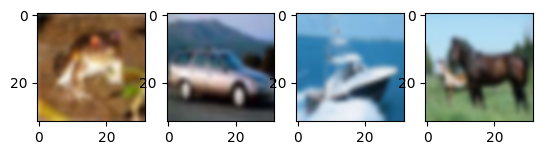

In [7]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [8]:
num_classes = 10

np_utils.to_categorical(y_train, num_classes)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
model1 = tf.keras.models.Sequential()

In [10]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.InputLayer(input_shape=(32,32,3)))

model1.add(tf.keras.layers.GaussianNoise(stddev=0.15, seed = 552))
#conv1a
model1.add(tf.keras.layers.Conv2D(128,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv1b
model1.add(tf.keras.layers.Conv2D(128,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv1c
model1.add(tf.keras.layers.Conv2D(128,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))

#pool1
model1.add(tf.keras.layers.MaxPooling2D(2,2))
#drop1
model1.add(tf.keras.layers.Dropout(rate=0.5,seed = 159))



#conv2a
model1.add(tf.keras.layers.Conv2D(256,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv2b
model1.add(tf.keras.layers.Conv2D(256,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv2c
model1.add(tf.keras.layers.Conv2D(256,(3,3), padding = 'same'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))

#pool2
model1.add(tf.keras.layers.MaxPooling2D(2,2))
#drop2
model1.add(tf.keras.layers.Dropout(rate=0.5,seed = 357))



#conv3a
model1.add(tf.keras.layers.Conv2D(512,(3,3), padding = 'valid'))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv3b
model1.add(tf.keras.layers.Conv2D(256,(1,1)))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#conv3c
model1.add(tf.keras.layers.Conv2D(128,(1,1)))
model1.add(tf.keras.layers.LeakyReLU(alpha=0.1))

#pool3
model1.add(tf.keras.layers.GlobalAveragePooling2D())

#dense
model1.add(tf.keras.layers.Dense(10))

#output
model1.add(tf.keras.layers.Softmax())

In [11]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise (GaussianNoi  (None, 32, 32, 3)        0         
 se)                                                             
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                      

In [ ]:
model1.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=1)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)